C:\Users\User\AppData\Local\Temp\ipykernel_19048\3862264981.py:56: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


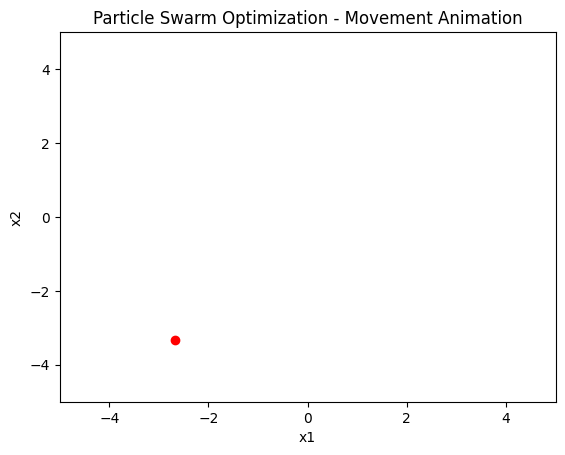

C:\Users\User\AppData\Local\Temp\ipykernel_19048\3862264981.py:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


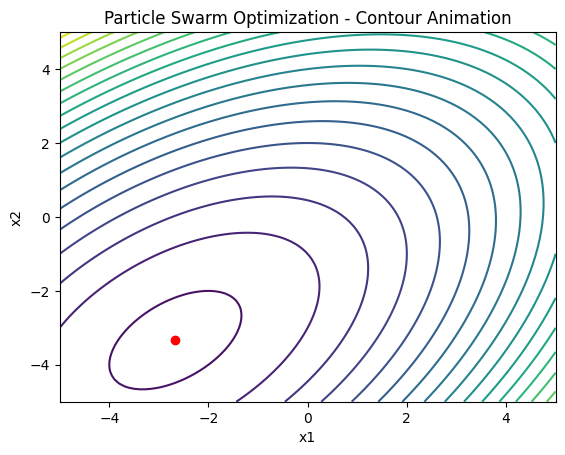

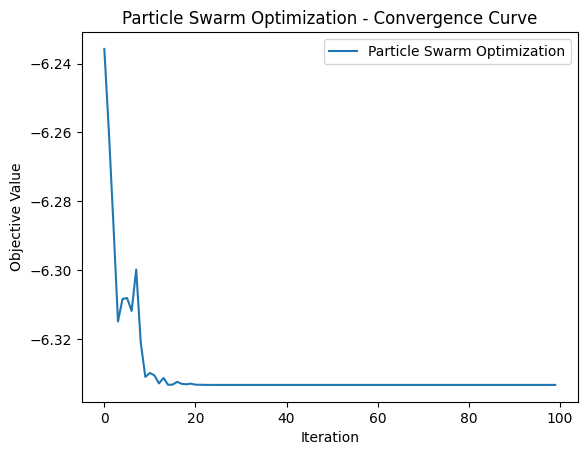


Particle Swarm Optimization:
Final Solution: [-2.66666665 -3.33333333]
Best Objective Value: -6.333333333333336


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def objective_function(X):
    if len(X) < 2:
        raise ValueError("Objective function requires at least 2 variables.")
    return X[0]**2 - X[0]*X[1] + X[1]**2 + 2*X[0] + 4*X[1] + 3


# Particle Swarm Optimization (PSO)
def pso(search_space, swarm_size, iterations, inertia_weight, cognitive_weight, social_weight):
    particles_position = np.random.uniform(search_space[0], search_space[1], size=(swarm_size, 2))
    particles_velocity = np.random.uniform(-1, 1, size=(swarm_size, 2))
    personal_best_positions = particles_position.copy()
    global_best_position = particles_position[np.argmin([objective_function(p) for p in particles_position])]

    history = []

    for iteration in range(iterations):
        for i in range(swarm_size):
            personal_weight = np.random.rand(2)
            social_weight = np.random.rand(2)
            particles_velocity[i] = inertia_weight * particles_velocity[i] + \
                                    cognitive_weight * personal_weight * (personal_best_positions[i] - particles_position[i]) + \
                                    social_weight * (global_best_position - particles_position[i])
            particles_position[i] += particles_velocity[i]

        current_fitness = np.array([objective_function(p) for p in particles_position])
        personal_best_fitness = np.array([objective_function(p) for p in personal_best_positions])

        update_personal_best = current_fitness < personal_best_fitness
        personal_best_positions[update_personal_best] = particles_position[update_personal_best]

        global_best_position = particles_position[np.argmin(current_fitness)]

        history.append((global_best_position.copy(), objective_function(global_best_position)))

    return global_best_position, objective_function(global_best_position), history

# Plotting functions
def plot_movement_animation(algorithm_name, history, search_space, save_gif=True):
    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Movement Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_contour_animation(algorithm_name, history, search_space, save_gif=True):
    x = np.linspace(search_space[0], search_space[1], 100)
    y = np.linspace(search_space[0], search_space[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Contour Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_contour_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_convergence_curve(algorithm_name, history):
    plt.plot(range(len(history)), [val[1] for val in history], label=algorithm_name)
    plt.title(f'{algorithm_name} - Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Main routine
search_space = (-5, 5)


# Particle Swarm Optimization
result_pso, best_value_pso, history_pso = pso(search_space, 20, 100, 0.5, 1.5, 1.5)
plot_movement_animation('Particle Swarm Optimization', history_pso, search_space)
plot_contour_animation('Particle Swarm Optimization', history_pso, search_space)
plot_convergence_curve('Particle Swarm Optimization', history_pso)
print("\nParticle Swarm Optimization:")
print("Final Solution:", result_pso)
print("Best Objective Value:", best_value_pso)


Particle Swarm Optimization:
Final Solution: [-2.66666668 -3.33333334]
Best Objective Value: -6.333333333333336


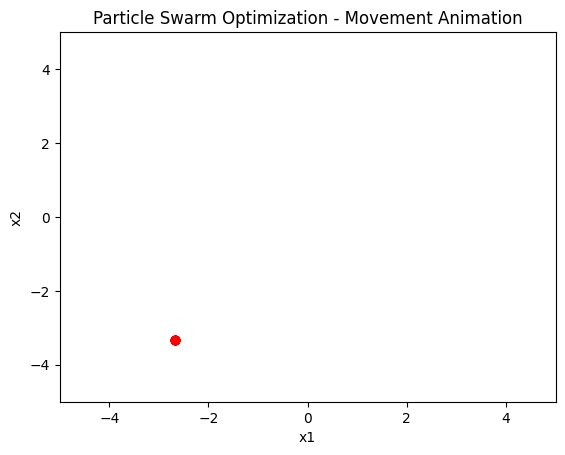

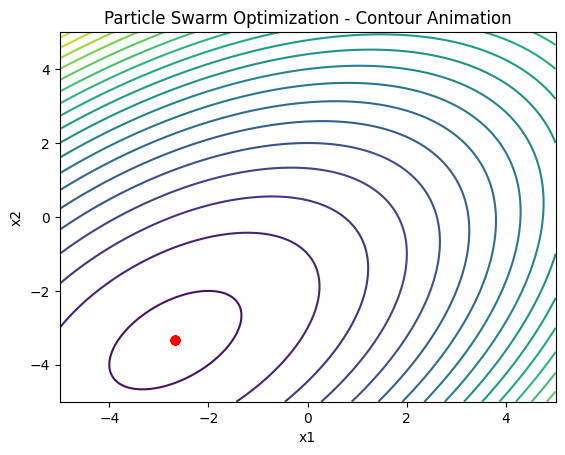

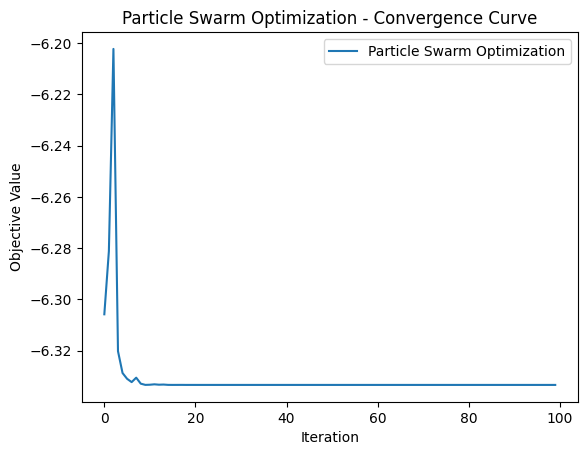

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def objective_function(X):
    if len(X) < 2:
        raise ValueError("Objective function requires at least 2 variables.")
    return X[0]**2 - X[0]*X[1] + X[1]**2 + 2*X[0] + 4*X[1] + 3

# Particle Swarm Optimization (PSO)
def pso(search_space, swarm_size, iterations, inertia_weight, cognitive_weight, social_weight):
    particles_position = np.random.uniform(search_space[0], search_space[1], size=(swarm_size, 2))
    particles_velocity = np.random.uniform(-1, 1, size=(swarm_size, 2))
    personal_best_positions = particles_position.copy()
    global_best_position = particles_position[np.argmin([objective_function(p) for p in particles_position])]

    history = []

    for iteration in range(iterations):
        for i in range(swarm_size):
            personal_weight = np.random.rand(2)
            social_weight = np.random.rand(2)
            particles_velocity[i] = inertia_weight * particles_velocity[i] + \
                                    cognitive_weight * personal_weight * (personal_best_positions[i] - particles_position[i]) + \
                                    social_weight * (global_best_position - particles_position[i])
            particles_position[i] += particles_velocity[i]

        current_fitness = np.array([objective_function(p) for p in particles_position])
        personal_best_fitness = np.array([objective_function(p) for p in personal_best_positions])

        update_personal_best = current_fitness < personal_best_fitness
        personal_best_positions[update_personal_best] = particles_position[update_personal_best]

        global_best_position = particles_position[np.argmin(current_fitness)]

        history.append((particles_position.copy(), objective_function(global_best_position)))

    return particles_position, objective_function(global_best_position), history

# Plotting functions
def plot_movement_animation(algorithm_name, history, search_space, save_gif=True):
    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    scatter, = ax.plot([], [], 'ro', animated=True)

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        positions, fitness = frame
        x, y = positions.T
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Movement Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_contour_animation(algorithm_name, history, search_space, save_gif=True):
    x = np.linspace(search_space[0], search_space[1], 100)
    y = np.linspace(search_space[0], search_space[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
    scatter, = ax.plot([], [], 'ro', animated=True)

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        positions, fitness = frame
        x, y = positions.T
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Contour Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_contour_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_convergence_curve(algorithm_name, history):
    plt.plot(range(len(history)), [val[1] for val in history], label=algorithm_name)
    plt.title(f'{algorithm_name} - Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Main routine
search_space = (-5, 5)

# Particle Swarm Optimization
result_pso, best_value_pso, history_pso = pso(search_space, 20, 100, 0.5, 1.5, 1.5)
best_solution_pso = result_pso[np.argmin([objective_function(p) for p in result_pso])]
print("\nParticle Swarm Optimization:")
print("Final Solution:", best_solution_pso)
print("Best Objective Value:", best_value_pso)
plot_movement_animation('Particle Swarm Optimization', history_pso, search_space)
plot_contour_animation('Particle Swarm Optimization', history_pso, search_space)
plot_convergence_curve('Particle Swarm Optimization', history_pso)
